## FEniCS/Dolfin

Connor Rauscher

#### What is FEniCS?

Fenics is an open-source project originally created by the University of Chicago and Chalmers University of Technology, but has since spread and is in active development by many universities around the world, along with the Argonne National Laboratory. It is a collection of scientific computing software that is made to allow automated solutions of differential equations, along with other mathematical operations. The software is mainly used for computational meshes, finite element analysis, partial differential equations, and numerical linear algebra. FEniCS is created with high performance and distributed computing using OpenMP in mind.

Dolfin is the main component of FEniCS, which provides algorithms and data structures which can make programming linear algebra and finite element analysis programs easier.

#### Installation and demo
The easiest way to install FEniCS is their Docker image, but source is available to compile from as well. These can be found on their Github page, or at https://fenicsproject.org/download/. 

Below is an example of a program that solves the Poisson equation on a unit square using the finite element method.

The poisson equation is a type of partial differential equation that is used to solve for scalar fields. Scalar fields are functions that assign a value to every point in space. The poisson equation solves for the scalar field that satisfies the following equation:
$$
-\Delta u = f
$$
where $u$ is the scalar field, $\Delta$ is the Laplacian operator, and $f$ is a given function. The Laplacian operator is the second derivative of the scalar field with respect to space. The poisson equation is often used to solve for the electric potential in electrostatics, or the temperature in heat conduction.

In [111]:
from fenics import *
# from dolfin import * also works, as most classes are imported from dolfin
import matplotlib.pyplot as plt

This first major part of the code below is to define the boundary and problem space. We are using a square mesh, made of many triangles. Our boundary is defined as the edges of the square, and our problem space is the interior of the square.

In [112]:
# Create mesh and define function space
# UnitSquareMesh is a triangle mesh of a unit square that takes in the number of cells in the x and y directions. Total triangles = 2*nx*ny, since it's a square.
mesh = UnitSquareMesh(32, 32)
# FunctionSpace is a class that represents a finite element function space. It takes in a mesh, an element family, and degrees in this case.
V = FunctionSpace(mesh, "Lagrange", 1)

# Define Dirichlet boundary (x = 0 or x = 1)
# The Dirichlet boundary is the boundary of the domain, so we define a function that returns true if x is on the boundary.
def boundary(x):
    # DOLFIN_EPS is a very small number, it's used to avoid floating point errors
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

# Define boundary condition
# On the boundary, the solution is 0.0
u0 = Constant(0.0)
# DirichletBC is a class that represents a Dirichlet boundary condition. It takes in a function space, a value on the boundary(0.0), and a boundary function that specifies boundary points.
bc = DirichletBC(V, u0, boundary)

Now that we have our problem space, we can define our problem. We are solving the Poisson equation, which is defined as:

$$ -\nabla^2 u = f $$

where $u$ is the unknown function, and $f$ is the right hand side of the equation. Using FEniCS, we will solve this equation using the finite element method. The finite element method is a numerical method for solving partial differential equations.




In [113]:
# Define variational problem

# These are the trial and test functions. They are defined on the function space V. They are used to represent the solution to the variational problem and the test function.
# The solution is found by minimizing the inner product between u and v.
u = TrialFunction(V)
v = TestFunction(V)

# f is a 2-dimensional gaussian function centered at (0.5, 0.5) with a standard deviation of 0.02. It's used for the right hand side of the variational problem.
# x[0] and x[1] are the x and y coordinates of the point. Degree is the degree of the polynomial used to approximate the function.
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
# g is a sine function with a frequency of 5. It's used for the right hand side of the variational problem.
g = Expression("sin(5*x[0])", degree=2)

# Hot plate example(explained below)
# f = Expression("x[0] > 0.4 && x[0] < 0.6 && x[1] > 0.4 && x[1] < 0.6 ? 10.0 : 0.0", degree=2)
# g = Constant(0)


# These expressions are the weak form of the Poisson equation. a represents the left hand side of the equation, and L represents the right hand side.
# dx and ds represent integration over the domain and boundary respectively. These are part of FEniCS and don't have to be user-specified.
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds


# Compute solution
# Function is a class that represents a finite element function. It takes in a function space.
u = Function(V)
# solve is a function that solves a variational problem. It takes in a variational problem, a function to store the solution, and a boundary condition.
solve(a == L, u, bc)

$\textbf{Note}$: f and g are functions that meet the boundary conditions. The definitions above are just an example given by FEniCS.

Here is another, simpler example equation for heat source at center region of a plate and perfectly insulated boundary:

This is much easier to imagine than the previous example. It is a heat source ternary function, where the heat source is 10 in the center region, and 0 everywhere else. The boundary conditions are that the temperature is 0 on the boundary.

f = Expression("x[0] > 0.4 && x[0] < 0.6 && x[1] > 0.4 && x[1] < 0.6 ? 10.0 : 0.0", degree=2)

g = Constant(0)

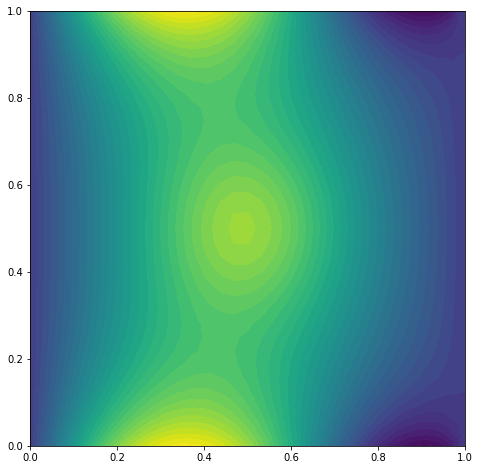

In [114]:
# Save solution in VTK format (Can be read by programs like Paraview which are designed for scientific visualization)
file = File("poisson.pvd")
file << u

# Plot solution using matplotlib
plt.figure(figsize=(8, 8))
plot(u)
plt.show()


Above is the final plot given after solving the equation. The default function above doesn't seem to represent anything, it is just an example function given by FEniCS. If you run the hot plate example, however, you will end up with this plot:

![plot](./images/plot.png)

It's pretty cool to see the heat source in the center region, and the temperature drop off as you get further away from the center. The heat source is 10 in the center region, and 0 everywhere else, but you can still see how the heat from the center has spread out. 

### Other examples

FEniCS can do much more than just solve the Poisson equation. It can also solve many other types of equations, including ordinary differential equations, and linear algebra equations. Below are a few images of some demos that FEniCS has. Many of these demos are much more complicated than the one above, which is why I chose to go more in depth with the Poisson equation than these demos.

#### Meshes

One of the most powerful parts of FEniCS is the ability to create meshes easily. Below are a few examples of built-in meshes that FEniCS has. These meshes can be used to solve and plot many different types of equations, just like the Poisson equation above. Custom meshes are also able to be created and used with FEniCS.

<!-- insert meshes.png as 800x600 image using HTML -->
<img src='images/meshes.png' width="650" height="400" />


#### Navier-Stokes

Navier-Stokes is a type of partial differential equation that is used to solve for the flow of a fluid. It is a system of partial differential equations that is used to solve for the velocity and pressure of a fluid. A demo is included that solves the navier-stokes equation for flow around a corner. 

<!-- add navstokes.png as 300x300px -->
<img src="./images/navstokes2.png" width="300" height="300">
<img src="./images/navstokes.png" width="300" height="300">

Along with this, another demo is included that solves the navier-stokes equation for flow around a custom dolphin mesh. These demos are able to be run using the FEniCS Docker image, and are included in the FEniCS source code. They run in just a few seconds.

<!-- add dolphin2.png, dolphin1.png, dolphin3.png as 300x300 each -->
<img src="./images/dolphin2.png" width="300" height="300">
<img src="./images/dolphin1.png" width="300" height="300">
<img src="./images/dolphin3.png" width="300" height="300">

#### Optimization

FEniCS is also useful for solving optimization problems using its built-in meshes and functions. The optimization demo included with FEniCS uses the adjoint method to optimize a starting mesh to mold it toward a target mesh. Using a goal function that measures the difference between the current solution and a target function, the script iteratively solves a forward and adjoint problem to update the mesh until convergence. Below is the starting point, the adjoint mesh, the target, and the optimized solution. 

<!-- display optimize1.png, optimize2.png, optimize3.png, optimize4.png as 300x300px -->
<img src="./images/optimize1.png" width="300" height="300">
<img src="./images/optimize2.png" width="300" height="300">
<img src="./images/optimize3.png" width="300" height="300">
<img src="./images/optimize4.png" width="300" height="300">

### Proposal

One interesting project that could be done using FEniCS would be simulating flow through different porous materials. We would create custom meshes to represent the porousness of different mediums and use FEniCS to solve the Navier-Stokes equations for fluid flow passing through them.

The results of the simulation would be presented in a figure showing the pressure colors and velocity vectors on the mesh. The x- and y-axes would represent the spatial dimensions of the mesh, while the length and direction of the vectors would represent the magnitude and direction of the fluid flow. The color would represent pressure buildup as seen in the navier-stokes examples.